In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('../dataset/clean_malicious_phish.csv')

In [22]:
df.head()

,Unnamed: 0,url,type
0,0,br-icloud.com.br,phishing
1,1,mp3raid.com/music/krizz_kaliko.html,benign
2,2,bopsecrets.org/rexroth/cr/1.htm,benign
3,3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [23]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


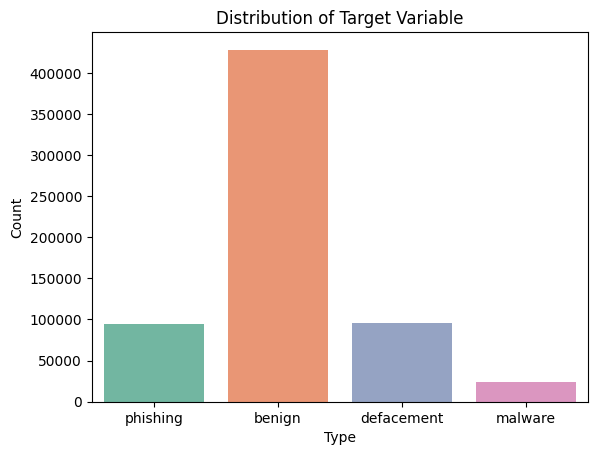

In [24]:
sns.countplot(data=df, x='type', palette='Set2', hue='type')
plt.title('Distribution of Target Variable')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [25]:
# Distinct the length of the URL
df['url_length'] = df['url'].apply(len)
df.head()

,url,type,url_length
0,br-icloud.com.br,phishing,16
1,mp3raid.com/music/krizz_kaliko.html,benign,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,31
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235


In [26]:
from urllib.parse import urlparse

def extract_url_features(url):
    parsed_url = urlparse(url)
    subdomain_count = len(parsed_url.netloc.split('.')) - 2
    path_depth = parsed_url.path.count('/')
    return subdomain_count, path_depth

In [27]:
df['subdomain_count'], df['path_depth'] = zip(*df['url'].apply(extract_url_features))

In [28]:
df.head()

,url,type,url_length,subdomain_count,path_depth
0,br-icloud.com.br,phishing,16,-1,0
1,mp3raid.com/music/krizz_kaliko.html,benign,35,-1,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,-1,3
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,1,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,0,1
